In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Temporal Series - Daily Cases (new and accumulated)

In [2]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-02-06,55330,84212,108629,10206,20062,288,1976689,167937,28851,422522,...,3941273,44812,79045,1,129643,1985,162029,2127,61427,34487
2021-02-07,55335,85336,109088,10251,20086,299,1980347,168088,28857,423839,...,3957177,45311,79098,1,130116,2001,162601,2127,62633,34552
2021-02-08,55359,86289,109313,10275,20112,316,1985501,168177,28860,424896,...,3971315,45650,79162,1,130596,2050,163213,2131,63573,34658
2021-02-09,55384,87528,109559,10312,20163,316,1993295,168300,28871,426093,...,3983756,46153,79204,1,131096,2064,163975,2131,64610,34781
2021-02-10,55402,88671,109782,10352,20210,350,2001034,168496,28879,427562,...,3996833,46778,79237,1,131476,2091,164736,2133,65573,34864


In [3]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-02-06,65.0,1130.0,0.0,34.0,32.0,11.0,6680.0,211.0,3.0,1333.0,...,18363.0,509.0,56.0,0.0,412.0,9.0,470.0,3.0,1000.0,156.0
2021-02-07,5.0,1124.0,459.0,45.0,24.0,11.0,3658.0,151.0,6.0,1317.0,...,15904.0,499.0,53.0,0.0,473.0,16.0,572.0,0.0,1206.0,65.0
2021-02-08,24.0,953.0,225.0,24.0,26.0,17.0,5154.0,89.0,3.0,1057.0,...,14138.0,339.0,64.0,0.0,480.0,49.0,612.0,4.0,940.0,106.0
2021-02-09,25.0,1239.0,246.0,37.0,51.0,0.0,7794.0,123.0,11.0,1197.0,...,12441.0,503.0,42.0,0.0,500.0,14.0,762.0,0.0,1037.0,123.0
2021-02-10,18.0,1143.0,223.0,40.0,47.0,34.0,7739.0,196.0,8.0,1469.0,...,13077.0,625.0,33.0,0.0,380.0,27.0,761.0,2.0,963.0,83.0


#### Countries with the biggest numbers of cases in the last day

In [4]:
df_daily_cases.tail().iloc[-1].nlargest(20)

Country/Region
US                94704.0
Brazil            59602.0
France            25678.0
Spain             18114.0
Russia            14258.0
United Kingdom    13077.0
Italy             12947.0
India             12923.0
Mexico            11138.0
Czechia           10283.0
Germany            9246.0
Indonesia          8776.0
Turkey             8642.0
Argentina          7739.0
Iran               7585.0
Poland             6960.0
Colombia           6443.0
Israel             6010.0
Portugal           4387.0
Sweden             4070.0
Name: 2021-02-10 00:00:00, dtype: float64

In [5]:
countries_observed = ["US", 
                      "Brazil", 
                      "Austria", 
                      "Spain",
                      "France",
                      #"Portugal",
                      "Russia",
                      #"China",
                      "India",
                      "Italy",
                     ]

### New Cases (moving average, 7 days)

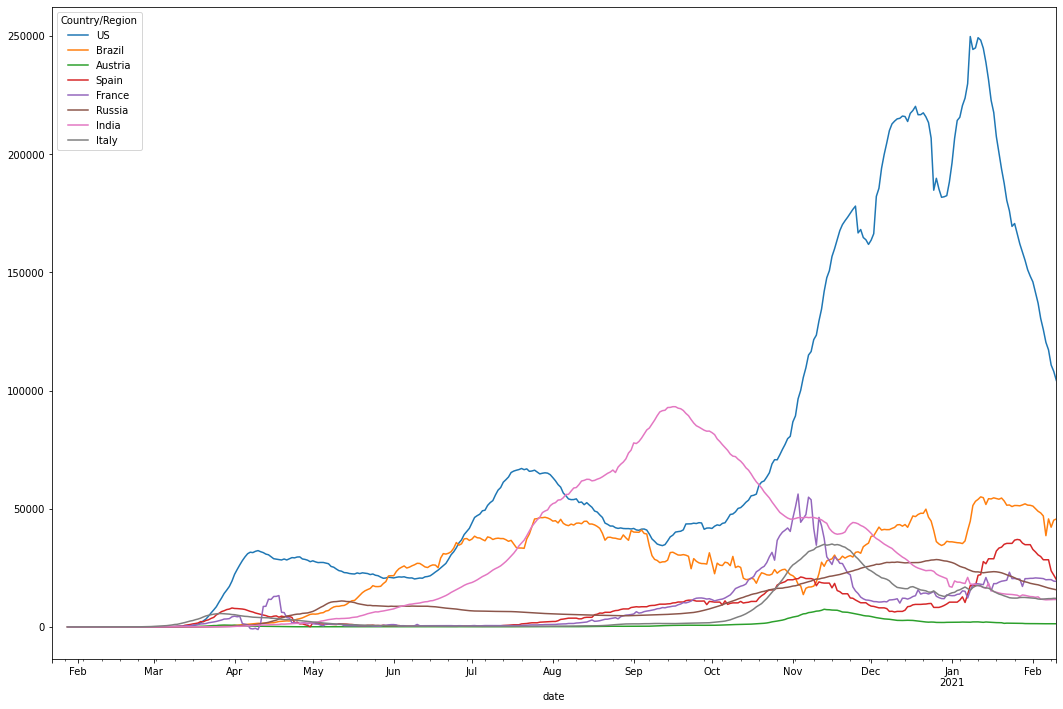

In [6]:
df_daily_cases[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Cases (log)

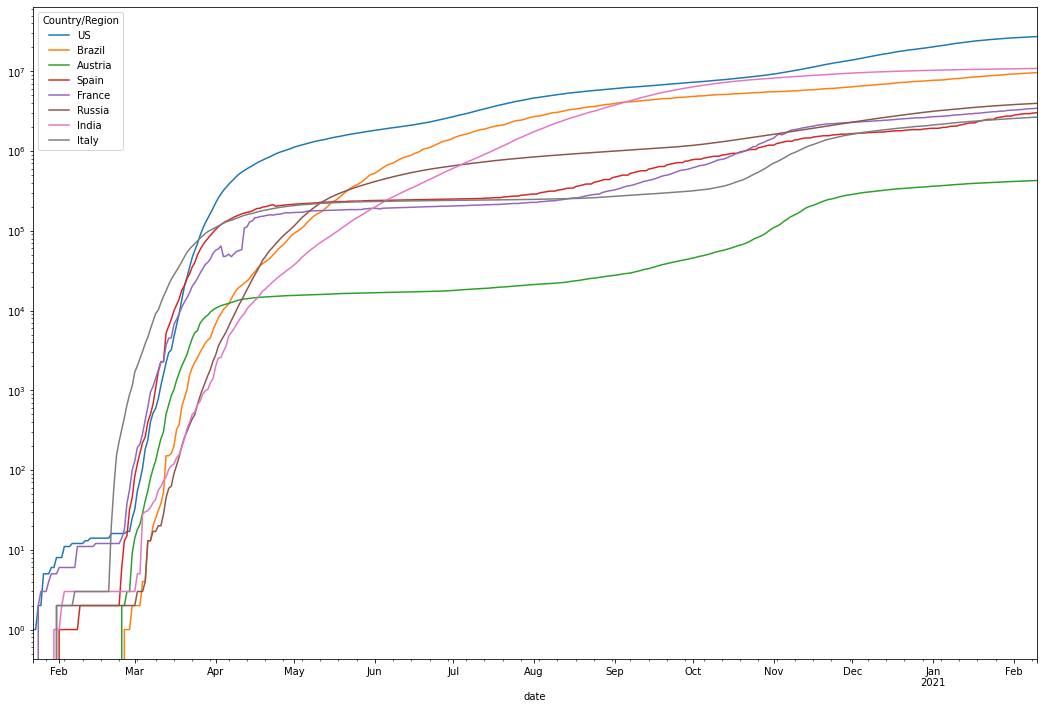

In [7]:
df_cases[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [8]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-02-06,2408,1446,2909,105,475,7,49110,3114,909,7994,...,112305,481,621,0,1228,35,1870,615,839,1316
2021-02-07,2410,1460,2914,106,475,7,49171,3117,909,8012,...,112681,490,621,0,1233,35,1881,615,853,1326
2021-02-08,2413,1472,2918,106,475,7,49398,3123,909,8032,...,113014,497,621,0,1240,35,1888,615,869,1339
2021-02-09,2414,1488,2924,106,478,8,49566,3126,909,8071,...,114066,506,621,0,1247,35,1897,615,881,1353
2021-02-10,2418,1503,2926,106,487,9,49674,3130,909,8114,...,115068,516,621,0,1253,35,1909,616,901,1364


#### Countries with the biggest numbers of deaths in the last day

In [9]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                3364.0
Brazil            1330.0
Mexico            1328.0
United Kingdom    1002.0
Germany            666.0
Spain              643.0
Russia             526.0
Poland             361.0
Italy              336.0
France             296.0
South Africa       276.0
Colombia           226.0
Indonesia          191.0
Ukraine            173.0
Portugal           161.0
Name: 2021-02-10 00:00:00, dtype: float64

#### Countries with the biggest numbers of deaths

In [10]:
df_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                471567
Brazil            234850
Mexico            169760
India             155360
United Kingdom    115068
Italy              92338
France             80591
Russia             76873
Spain              63704
Germany            63672
Iran               58686
Colombia           56733
Argentina          49674
South Africa       47145
Peru               42626
Name: 2021-02-10 00:00:00, dtype: int64

In [11]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2021-02-06,2614.0,0.0,21.0,0.0,191.0,490.0,78.0,385.0
2021-02-07,1307.0,1500.0,18.0,0.0,171.0,420.0,84.0,270.0
2021-02-08,1596.0,0.0,20.0,909.0,460.0,398.0,78.0,307.0
2021-02-09,3131.0,1986.0,39.0,766.0,724.0,519.0,94.0,422.0
2021-02-10,3364.0,1330.0,43.0,643.0,296.0,526.0,108.0,336.0


### New Deaths (moving average, 7 days)

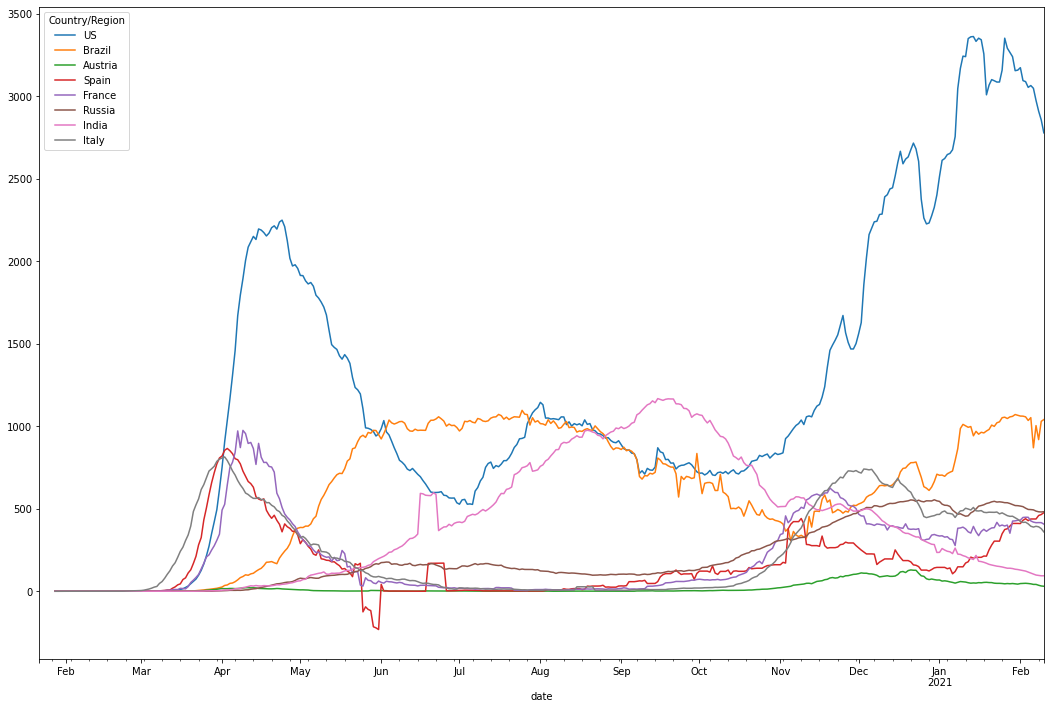

In [12]:
df_daily_deaths[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Deaths (log)

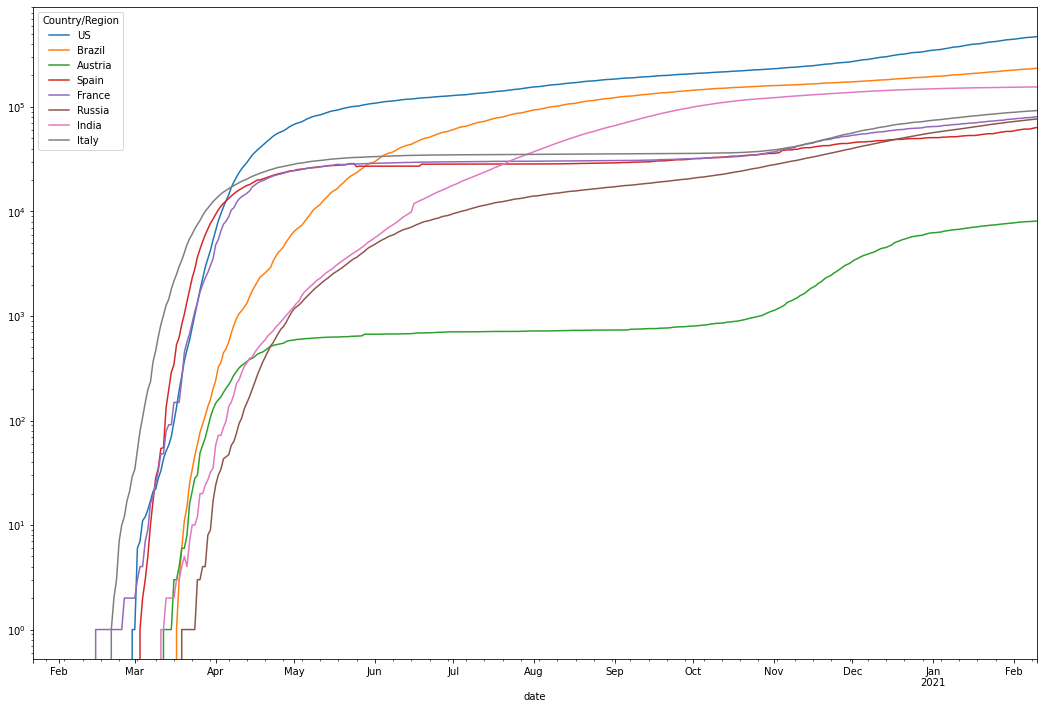

In [13]:
df_deaths[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [14]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)

# fixing error in the original series
df_recovered.loc["2020-03-17","Austria"] = 8 
df_recovered.loc["2020-02-23","Italy"] = 1

df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered[df_daily_recovered >= 0][countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2021-02-06,0.0,32844.0,1522.0,0.0,1144.0,22546.0,11805.0,15138.0
2021-02-07,0.0,38990.0,1202.0,0.0,284.0,19784.0,11904.0,11380.0
2021-02-08,0.0,10836.0,1249.0,0.0,1017.0,15834.0,14016.0,15082.0
2021-02-09,0.0,98389.0,1374.0,0.0,1724.0,21419.0,13087.0,15827.0
2021-02-10,0.0,39075.0,1245.0,0.0,1396.0,22178.0,11764.0,16467.0


### New Recovered (moving average, 7 days)

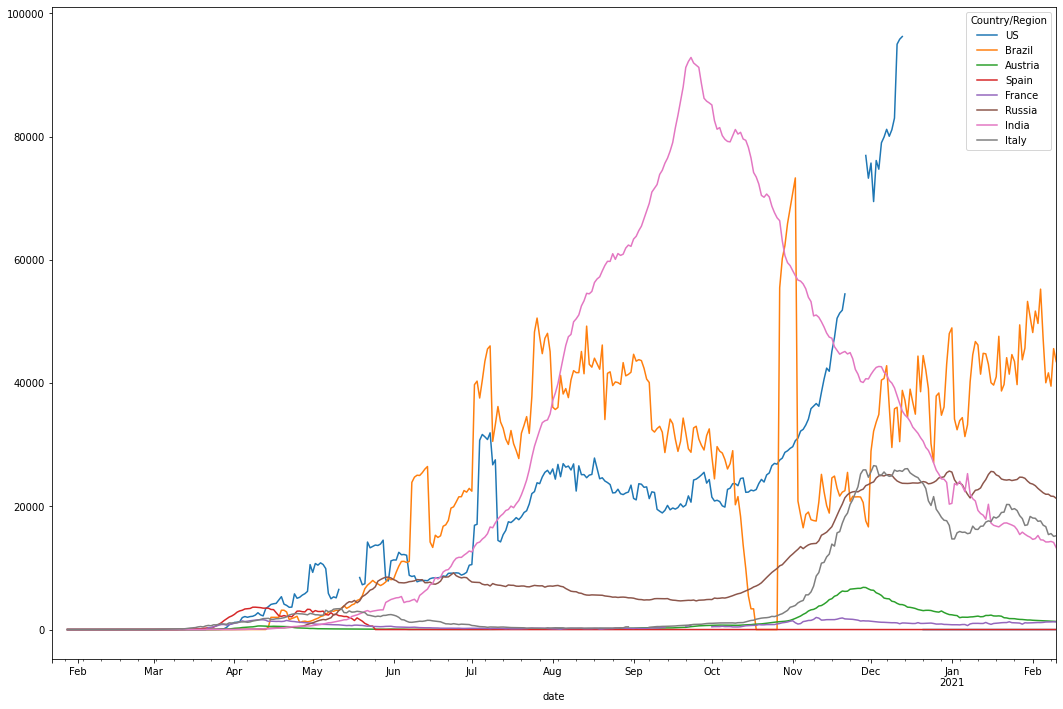

In [40]:
df_daily_recovered[df_daily_recovered >= 0][countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Recovered (log)

In [17]:
df_recovered.loc["2020-02-23","Italy"] = 1

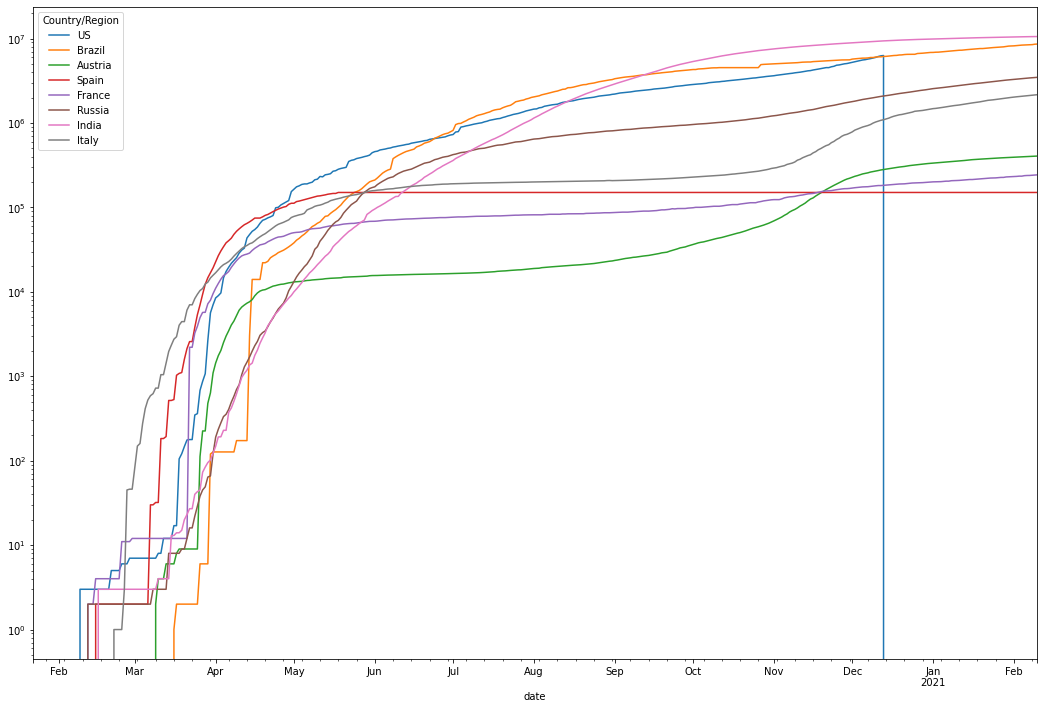

In [18]:
df_recovered[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [19]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [20]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [21]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [22]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [23]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [24]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [25]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [26]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [27]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [28]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [29]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [30]:
# Aligninig names of countries (e.g US and United States)
df_wp.loc[2, 'Country (or dependency)'] = 'US'
cop = df_wp.loc[df_wp["Country (or dependency)"].isin(countries_observed)][["Country (or dependency)",
                                                                            "Population (2020)"]]
cop

,Country (or dependency),Population (2020)
1,India,1.380004e+09
2,US,3.310027e+08
5,Brazil,2.125594e+08
8,Russia,1.459345e+08
21,France,6.527351e+07
22,Italy,6.046183e+07
29,Spain,4.675478e+07
96,Austria,9.006398e+06


In [31]:
pops = []
for country in countries_observed:
    p = cop[cop['Country (or dependency)'] == country]['Population (2020)'].values[0]
    pops.append(p)

## Temporal Series - Cumulative Cases per Population

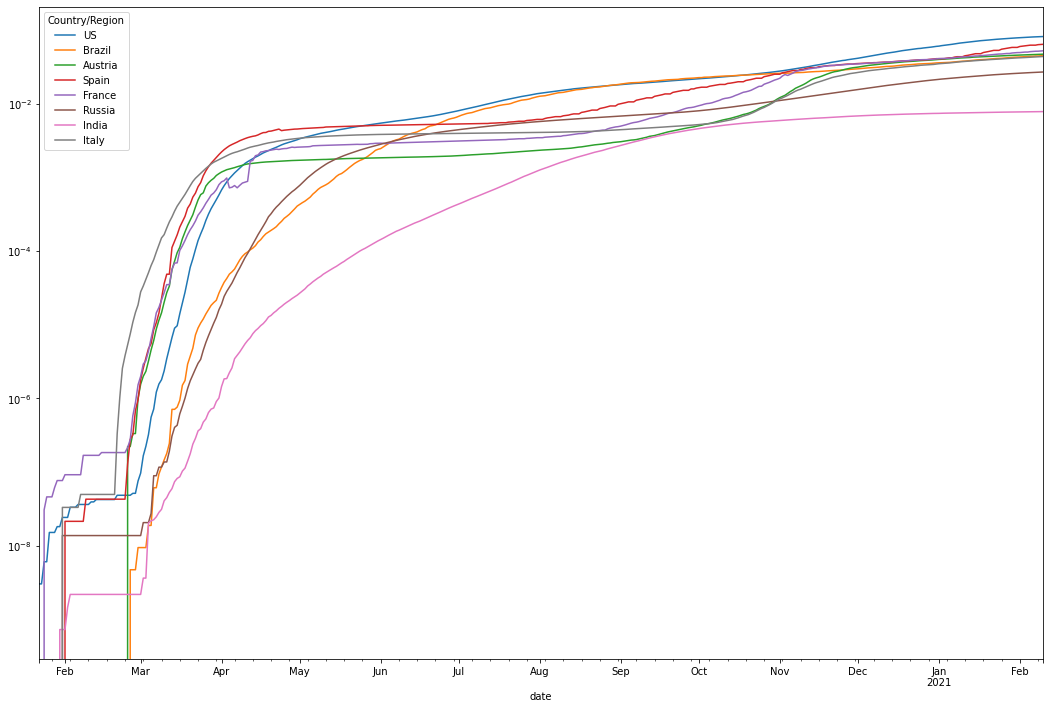

In [32]:
df_cases[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

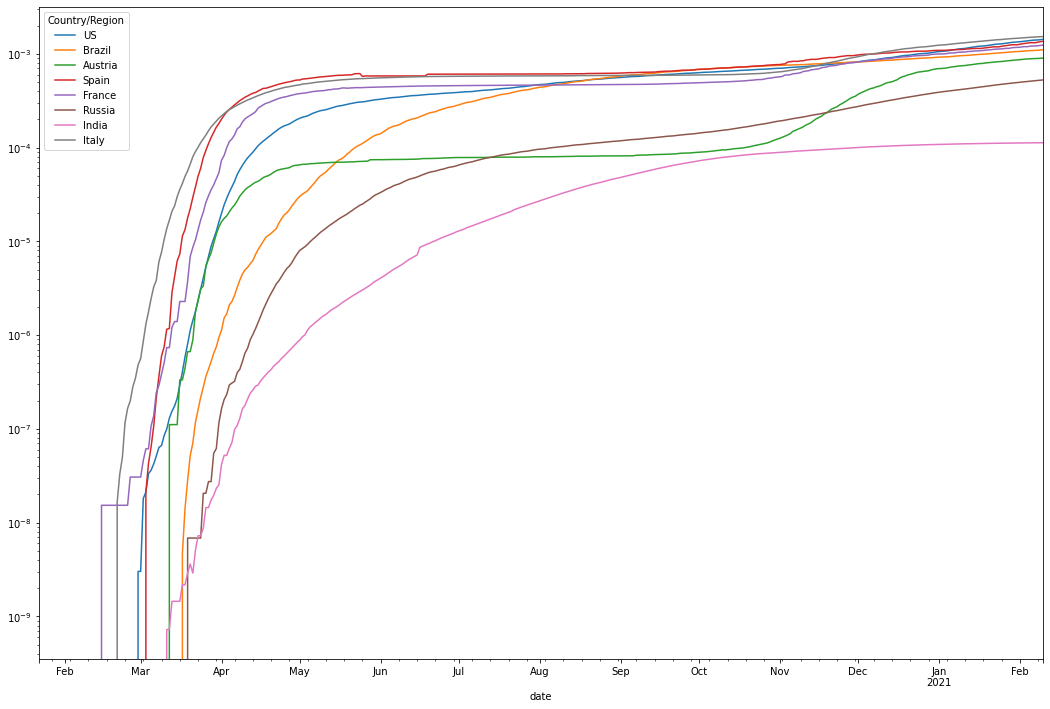

In [33]:
df_deaths[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

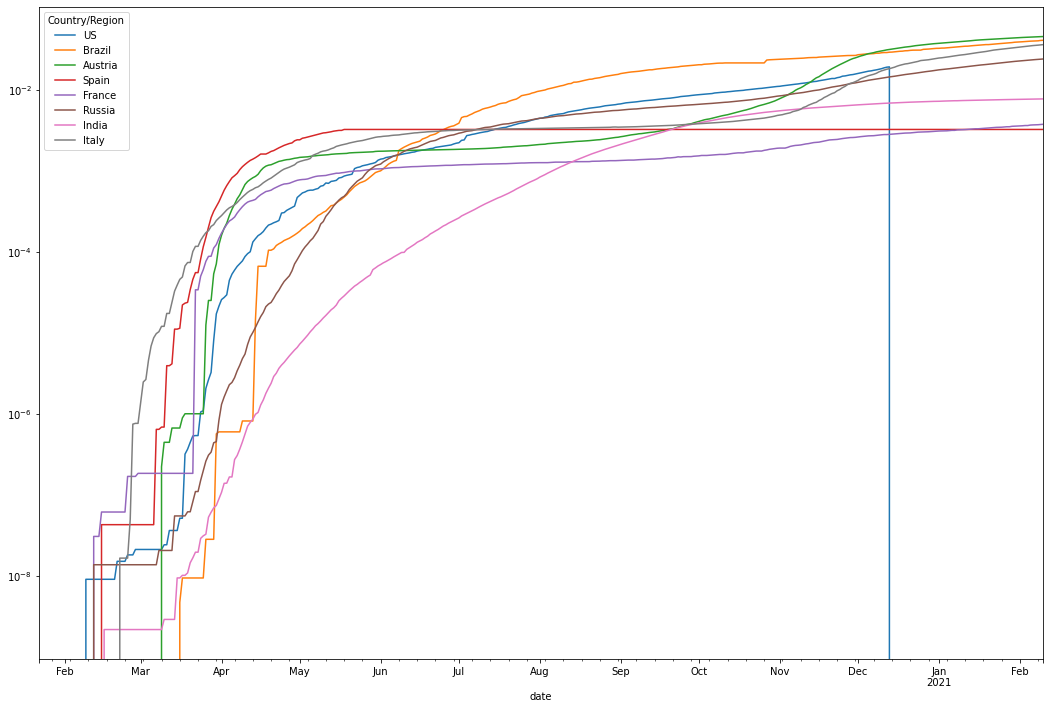

In [34]:
df_recovered[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

### Deaths / cases ratio

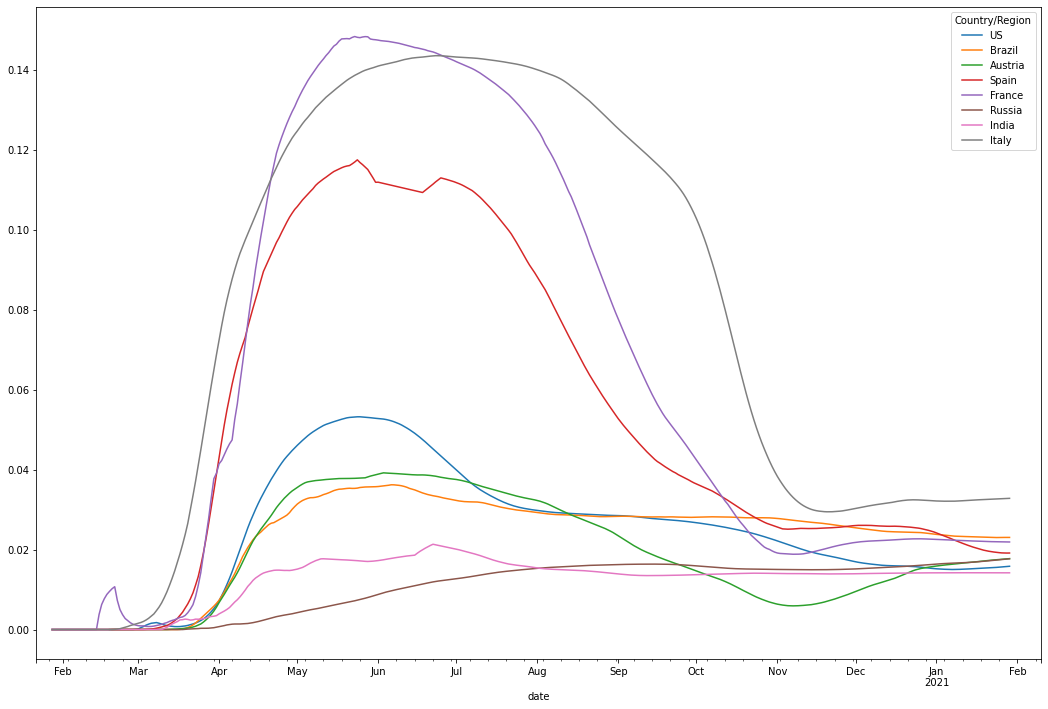

In [35]:
ratio = df_deaths/df_cases.shift(-12)
ratio[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()